In [2]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi bantuan untuk menampilkan gambar di Colab
# Karena cv2.imshow() tidak berfungsi di Colab, kita pakai Matplotlib
def tampilkan_gambar(judul, gambar):
  """Menampilkan sebuah gambar dengan judul menggunakan Matplotlib."""
  # Konversi gambar dari BGR (format OpenCV) ke RGB (format Matplotlib)
  gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
  plt.imshow(gambar_rgb)
  plt.title(judul)
  plt.axis('off') # Menyembunyikan sumbu x dan y

def tampilkan_gambar_gray(judul, gambar):
  """Menampilkan gambar grayscale dengan judul."""
  plt.imshow(gambar, cmap='gray')
  plt.title(judul)
  plt.axis('off')

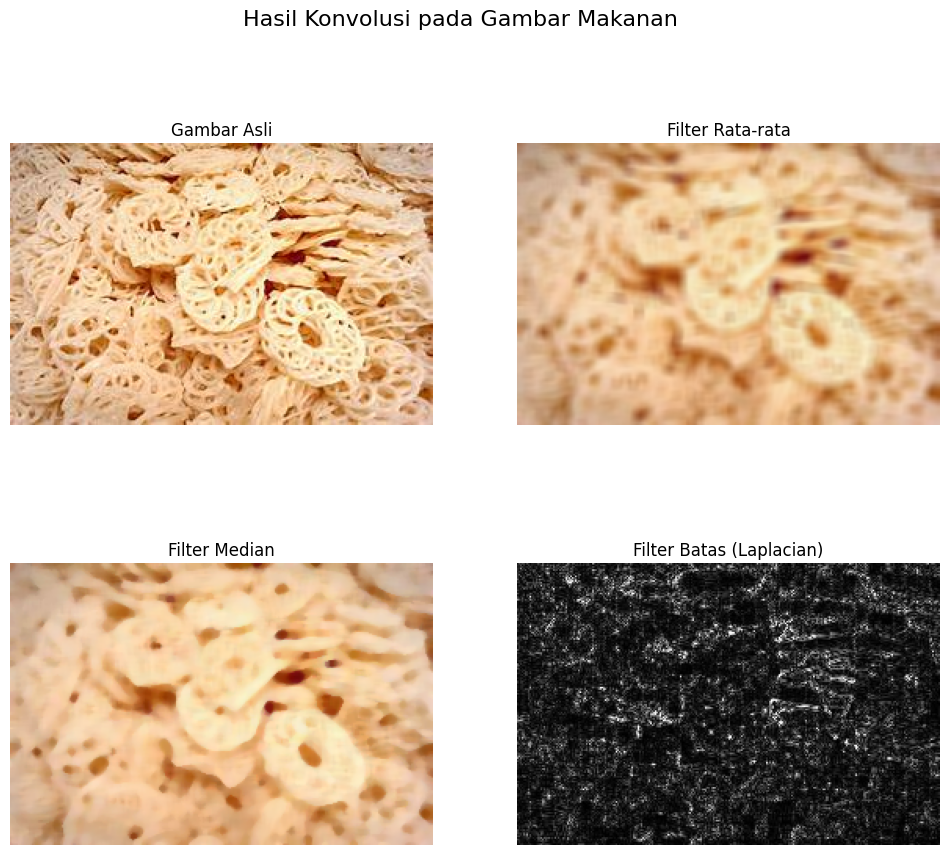

In [3]:
# Ganti nama file ini jika nama file Anda berbeda
NAMA_FILE_MAKANAN = 'kerupuk.jpg'

# 1. Memuat gambar
img_makanan = cv2.imread(NAMA_FILE_MAKANAN)

if img_makanan is None:
  print(f"Error: Gambar '{NAMA_FILE_MAKANAN}' tidak ditemukan. Pastikan sudah diunggah.")
else:
  # 2. Aplikasi Filter Rata-rata (Mean Filter)
  # Menggunakan fungsi cv2.blur() yang lebih efisien dengan kernel 7x7
  makanan_rata_rata = cv2.blur(img_makanan, (7, 7))

  # 3. Aplikasi Filter Median
  # Ukuran kernel harus ganjil, misal 7
  makanan_median = cv2.medianBlur(img_makanan, 7)

  # 4. Aplikasi Filter Batas (Edge Detection) menggunakan Laplacian
  # Filter batas lebih efektif pada gambar grayscale
  img_makanan_gray = cv2.cvtColor(img_makanan, cv2.COLOR_BGR2GRAY)
  laplacian = cv2.Laplacian(img_makanan_gray, cv2.CV_64F)
  makanan_batas = cv2.convertScaleAbs(laplacian)

  # 5. Menampilkan semua hasil dalam satu plot
  plt.figure(figsize=(12, 10))

  plt.subplot(2, 2, 1)
  tampilkan_gambar("Gambar Asli", img_makanan)

  plt.subplot(2, 2, 2)
  tampilkan_gambar("Filter Rata-rata", makanan_rata_rata)

  plt.subplot(2, 2, 3)
  tampilkan_gambar("Filter Median", makanan_median)

  plt.subplot(2, 2, 4)
  tampilkan_gambar_gray("Filter Batas (Laplacian)", makanan_batas)

  plt.suptitle("Hasil Konvolusi pada Gambar Makanan", fontsize=16)
  plt.show()

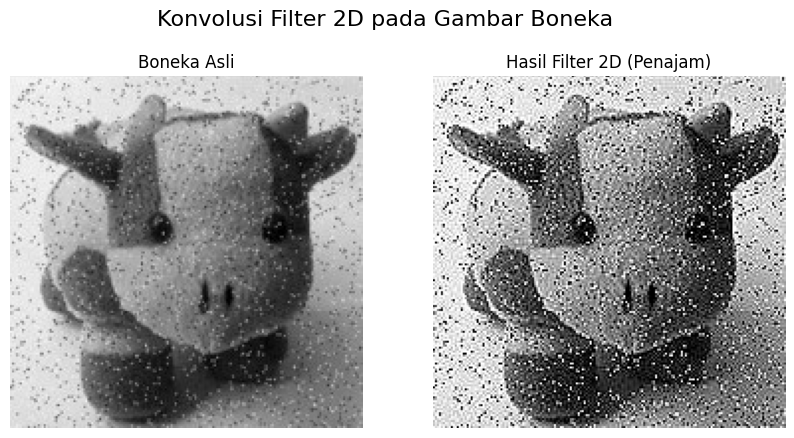

In [4]:
# Ganti nama file ini jika nama file Anda berbeda
NAMA_FILE_BONEKA = 'boneka.jpg'

# 1. Memuat gambar boneka
img_boneka = cv2.imread(NAMA_FILE_BONEKA)

if img_boneka is None:
  print(f"Error: Gambar '{NAMA_FILE_BONEKA}' tidak ditemukan. Pastikan sudah diunggah.")
else:
  # 2. Membuat kernel kustom untuk filter 2D (contoh: kernel penajam/sharpening)
  kernel_penajam = np.array([
      [ 0, -1,  0],
      [-1,  5, -1],
      [ 0, -1,  0]
  ])

  # 3. Menerapkan konvolusi menggunakan cv2.filter2D()
  # ddepth = -1 berarti gambar output akan memiliki kedalaman (tipe data) yang sama dengan input
  boneka_tajam = cv2.filter2D(src=img_boneka, ddepth=-1, kernel=kernel_penajam)

  # 4. Menampilkan hasil
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  tampilkan_gambar("Boneka Asli", img_boneka)

  plt.subplot(1, 2, 2)
  tampilkan_gambar("Hasil Filter 2D (Penajam)", boneka_tajam)

  plt.suptitle("Konvolusi Filter 2D pada Gambar Boneka", fontsize=16)
  plt.show()